In [1]:
from pycaret.regression import *

import pandas as pd
import numpy as np

df = pd.read_csv(r'https://raw.githubusercontent.com/data-to-insight/ERN-sessions/main/data/1980%202023%20average%20house%20prices.csv')

df['Period'] = pd.to_datetime(df['Period'], format="%Y-%m")

df = df[['Period', 'Average price All property types']]

df


,Period,Average price All property types
0,1980-01-01,19273
1,1980-02-01,19273
2,1980-03-01,19273
3,1980-04-01,20044
4,1980-05-01,20044
...,...,...
518,2023-03-01,282548
519,2023-04-01,283871
520,2023-05-01,285053
521,2023-06-01,288281


In [10]:
model_data = df[df['Period'] > pd.to_datetime("2002", format="%Y")]
model_data = model_data[model_data['Period'] <= pd.to_datetime("2008", format="%Y")]
real_future_data = df[df['Period'] >= pd.to_datetime("2008", format="%Y")]

model_data


,Period,Average price All property types
265,2002-02-01,101164
266,2002-03-01,104705
267,2002-04-01,106121
268,2002-05-01,108852
269,2002-06-01,113304
...,...,...
332,2007-09-01,190032
333,2007-10-01,189589
334,2007-11-01,189489
335,2007-12-01,189193


In [11]:
# date - dates
# ordinal - scales/rankings
# categorical - categories
# numberic - numberic variable 

s = setup(data=model_data,
          train_size=0.7,
          target='Average price All property types',
          date_features=['Period'],
          fold=2,
          fold_shuffle=False,
          data_split_shuffle=False,
          fold_strategy='timeseries',
          session_id=123
          )

,Description,Value
0,Session id,123
1,Target,Average price All property types
2,Target type,Regression
3,Original data shape,"(72, 2)"
4,Transformed data shape,"(72, 4)"
5,Transformed train set shape,"(50, 4)"
6,Transformed test set shape,"(22, 4)"
7,Date features,1
8,Preprocess,True
9,Imputation type,simple


In [12]:
best = compare_models(sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,3876.6779,23018432.7662,4354.2585,-0.4405,0.0278,0.0253,0.0150
lasso,Lasso Regression,6615.0115,50999792.9001,7102.0288,-1.4866,0.0459,0.0441,0.0150
llar,Lasso Least Angle Regression,6615.1179,51001114.2288,7102.1321,-1.4866,0.0459,0.0441,0.0150
lr,Linear Regression,6620.9175,51078144.2554,7107.8003,-1.4893,0.0459,0.0441,0.0200
lar,Least Angle Regression,6620.9175,51078144.2554,7107.8003,-1.4893,0.0459,0.0441,0.0200
en,Elastic Net,11194.2916,151591097.8381,11818.1115,-3.5632,0.0833,0.0755,0.0250
dt,Decision Tree Regressor,12476.5000,202081933.3125,14215.5104,-7.7756,0.0994,0.0826,0.0150
et,Extra Trees Regressor,12476.5000,202081933.3125,14215.5104,-7.7756,0.0994,0.0826,0.0900
gbr,Gradient Boosting Regressor,12477.6280,201706546.6737,14202.2534,-7.7480,0.0993,0.0826,0.0400
rf,Random Forest Regressor,12966.6244,213455539.1033,14606.9978,-8.0752,0.1024,0.0860,0.1050


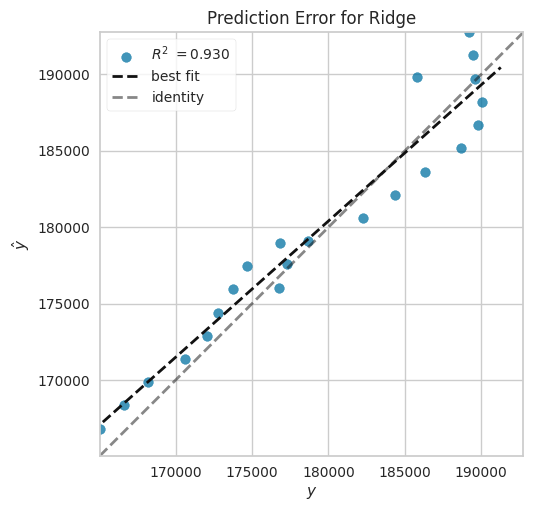

In [13]:
plot_model(best, plot='error')

In [14]:
future_dates = pd.date_range(start='2011-01-01', end='2030-01-01', freq='MS')

future_df = pd.DataFrame()
future_df['Period'] = future_dates

predictions_future = predict_model(best, data=future_df)

predictions_future

,Period,prediction_label
0,2011-01-01,231222.052944
1,2011-02-01,232741.724990
2,2011-03-01,234261.397036
3,2011-04-01,235781.069082
4,2011-05-01,237300.741129
...,...,...
224,2029-09-01,491661.498994
225,2029-10-01,493181.171040
226,2029-11-01,494700.843086
227,2029-12-01,496220.515132


In [15]:
import plotly.express as px

concat_df = pd.concat([model_data, predictions_future], axis=0)

fig = px.line(concat_df, x=concat_df['Period'], y=['Average price All property types', 'prediction_label'])
fig.add_scatter(x=df['Period'], y=df['Average price All property types'])

fig.show()

In [16]:
final_val = model_data['Average price All property types'].iloc[-1]
first_val = predictions_future['prediction_label'].iloc[0]

predictions_future['corrected val'] = predictions_future['prediction_label'] - first_val + final_val

concat_df = pd.concat([model_data, predictions_future], axis=0)

fig = px.line(concat_df, x=concat_df['Period'], y=['Average price All property types', 'corrected val'])
fig.add_scatter(x=df['Period'], y=df['Average price All property types'])

fig.show()